In [ ]:
#Prediction House prices

# Linear Regression 
# Ridge Regression
# Polynomial Regression
# Random Forest Regression

In [81]:
# Importing Libraries 
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge


In [2]:
housing = pd.read_csv('USA_Housing.csv')  # load our data

housing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
#change display format of the column

pd.options.display.float_format='{: .2f}'.format

housing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.46,5.68,7.01,4.09,23086.80,1059033.56,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64,6.00,6.73,3.09,40173.07,1505890.91,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.07,5.87,8.51,5.13,36882.16,1058987.99,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24,7.19,5.59,3.26,34310.24,1260616.81,USS Barnett\nFPO AP 44820
4,59982.20,5.04,7.84,4.23,26354.11,630943.49,USNS Raymond\nFPO AE 09386


In [4]:
# info about data set 

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
#statiscial summary of our data set

housing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,68583.11,5.98,6.99,3.98,36163.52,1232072.65
std,10657.99,0.99,1.01,1.23,9925.65,353117.63
min,17796.63,2.64,3.24,2.00,172.61,15938.66
25%,61480.56,5.32,6.30,3.14,29403.93,997577.14
50%,68804.29,5.97,7.00,4.05,36199.41,1232669.38
75%,75783.34,6.65,7.67,4.49,42861.29,1471210.20
max,107701.75,9.52,10.76,6.50,69621.71,2469065.59


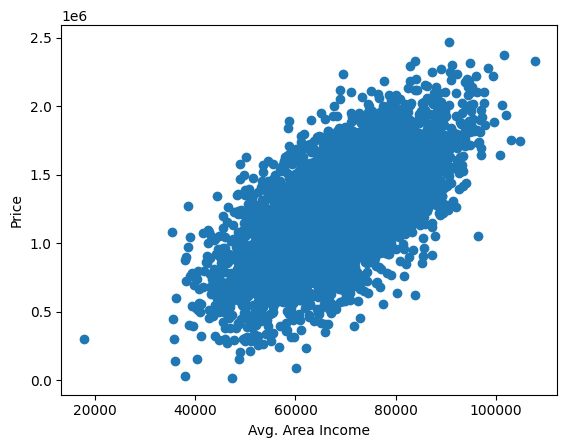

In [7]:
#Exploratory Data analysis
# CREATE A scatter plot of the different relationship to show between features  and the response 

#scatter plot for avg area income vs hosue price 

plt.scatter(housing['Avg. Area Income'], housing['Price'])

plt.xlabel('Avg. Area Income')
plt.ylabel('Price')

plt.show()

In [8]:
#corrleation matrix

corr_matrix=housing.corr()
corr_matrix

C:\Users\Maciej JAROS\AppData\Local\Temp\ipykernel_19448\165097665.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=housing.corr()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.00,-0.00,-0.01,0.02,-0.02,0.64
Avg. Area House Age,-0.00,1.00,-0.01,0.01,-0.02,0.45
Avg. Area Number of Rooms,-0.01,-0.01,1.00,0.46,0.00,0.34
Avg. Area Number of Bedrooms,0.02,0.01,0.46,1.00,-0.02,0.17
Area Population,-0.02,-0.02,0.00,-0.02,1.00,0.41
Price,0.64,0.45,0.34,0.17,0.41,1.00


<AxesSubplot: >

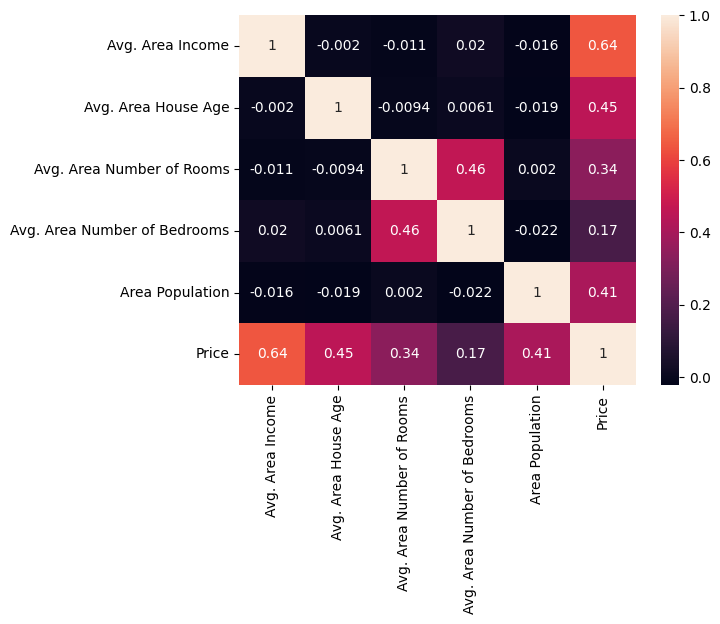

In [9]:
#heat map

sns.heatmap(corr_matrix, annot=True)

In [11]:
# create our x and y variables you need to add two more columns 

#X = housing[[ 'Avg. Area Income' , 'Avg. Area House Age' , 'Avg. Area Number of Rooms', ]]
#y=housing['Price']



In [14]:
# same as above without writing !  specyfying X and Y variables 

X=housing.iloc[: , 0:5]
y=housing.iloc[: , 5]

In [15]:
# train, test and split my data  import sklearn model_selection

X_train, X_test, y_train , y_test= train_test_split(X,y, test_size=0.3, random_state=32)



In [19]:
# you need to import ---> from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [20]:
X_train

array([[ 1.59040251, -1.25342455,  0.03093039,  1.18561212,  1.04112755],
       [-0.33983414, -0.81771797, -0.40843542, -1.38022608,  0.09352181],
       [-0.72255555,  1.25874155, -0.05129489, -1.48578271, -1.09476994],
       ...,
       [-0.85733275, -1.21626396,  0.55458975,  0.27620111, -0.49895727],
       [-1.17713306,  1.12716298,  0.84651451, -0.77124549, -0.27223194],
       [-0.71257699, -0.63957   ,  1.25335368, -0.54389274,  0.72817097]])

In [22]:
## Linear Regression you need to import this -->  from sklearn.linear_model import LinearRegression
## this lin_reg you can call this var anything you want but for clear reading it's caleed lin_reg

lin_reg= LinearRegression()

lin_reg.fit(X_train,y_train)




LinearRegression()

In [23]:
pred_lin= lin_reg.predict(X_test)

In [24]:
## create a data frame for the predictions, you can save it as variable it's NOT SAVED RIGHT NOW IN VARIABLE

pd.DataFrame({'Actual': y_test, 'Predicted': pred_lin})

,Actual,Predicted
3279,1046957.12,1031714.59
1823,1308243.92,1365091.87
287,1592768.24,1599154.19
531,911202.17,935455.12
3480,983994.27,969720.36
...,...,...
2526,714166.40,610108.92
2172,1649947.16,1694724.50
3410,774674.06,651485.81
4472,974599.96,953809.36


In [26]:
# when you want to check metrcis do from sklearn import metrics

# Mean absolute error MAE
# Mean square error MSE
# The root mean square error RMSE
# R2 square error 0.99  0-1


print('MAE:', metrics.mean_absolute_error(y_test, pred_lin))
print('MSE:', metrics.mean_squared_error(y_test, pred_lin))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pred_lin)))
print('R2:', metrics.r2_score(y_test,pred_lin))






MAE: 83097.56621241024
MSE: 10561618897.734407
RMSE: 102769.73726605711
R2: 0.9176979092641557


In [28]:
# Lasso regression , alpha determine how the algorithm will perform
# 

model_lasso= Lasso(alpha=0.1)

model_lasso.fit(X_train,y_train)


Lasso(alpha=0.1)

In [30]:
pred_lasso=model_lasso.predict(X_test)

pd.DataFrame({'Actual': y_test, 'Predicted': pred_lasso})

,Actual,Predicted
3279,1046957.12,1031714.92
1823,1308243.92,1365091.42
287,1592768.24,1599153.94
531,911202.17,935455.27
3480,983994.27,969720.12
...,...,...
2526,714166.40,610109.21
2172,1649947.16,1694724.24
3410,774674.06,651485.96
4472,974599.96,953809.33


In [31]:
#metrics evaluation 

print('MAE:', metrics.mean_absolute_error(y_test, pred_lasso))
print('MSE:', metrics.mean_squared_error(y_test, pred_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pred_lasso)))
print('R2:', metrics.r2_score(y_test,pred_lasso))

MAE: 83097.56594011807
MSE: 10561619740.578308
RMSE: 102769.74136669951
R2: 0.9176979026962407


In [69]:
#random forest regression  --> from sklearn.ensemble import RandomForestRegressor
#n_estimators that's a number of combination different trees , less trees faster , more trees more complex slower
# try changing n_estimator, random_state to check if will make influence on results

rf_reg=RandomForestRegressor(n_estimators=100,random_state=32)

rf_reg.fit(X_train,y_train)



RandomForestRegressor(random_state=32)

In [72]:
rf_reg_pred=rf_reg.predict(X_test)



In [73]:
pd.DataFrame({'Actual': y_test, 'Predicted': rf_reg_pred})


,Actual,Predicted
3279,1046957.12,1205111.39
1823,1308243.92,1398389.71
287,1592768.24,1581707.85
531,911202.17,975125.68
3480,983994.27,953419.11
...,...,...
2526,714166.40,648742.94
2172,1649947.16,1557169.96
3410,774674.06,676140.65
4472,974599.96,954864.49


In [74]:
#Measuring accuracy 

print('MAE:', metrics.mean_absolute_error(y_test, rf_reg_pred))
print('MSE:', metrics.mean_squared_error(y_test, rf_reg_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,rf_reg_pred)))
print('R2:', metrics.r2_score(y_test,rf_reg_pred))

MAE: 96926.85615236194
MSE: 14810026692.262495
RMSE: 121696.45308004049
R2: 0.8845919198155946


In [77]:
# Polynomial Regression use is still Linear regression but adding a degree  , Polynomial feastures from sklearn.preprocessing


poly_reg=PolynomialFeatures(degree=2) # we adding features

X_train_2=poly_reg.fit_transform(X_train)
X_test_2=poly_reg.transform(X_test)



mul_reg=LinearRegression()# here we adding features here to standard scalling

mul_reg.fit(X_train_2,y_train)




LinearRegression()

In [79]:
#Prediction

mul_pred=mul_reg.predict(X_test_2)
pd.DataFrame({ 'Actual' : y_test, 'Predicted': mul_pred})

,Actual,Predicted
3279,1046957.12,1018874.05
1823,1308243.92,1369109.14
287,1592768.24,1595398.32
531,911202.17,934277.14
3480,983994.27,969292.63
...,...,...
2526,714166.40,608480.69
2172,1649947.16,1696120.90
3410,774674.06,648901.24
4472,974599.96,956112.32


In [80]:
print('MAE:', metrics.mean_absolute_error(y_test, mul_pred))
print('MSE:', metrics.mean_squared_error(y_test, mul_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,mul_pred)))
print('R2:', metrics.r2_score(y_test,mul_pred))

MAE: 83197.19928199188
MSE: 10589308430.67793
RMSE: 102904.36545977012
R2: 0.9174821368077911


In [82]:
# ridge regression 

model_rige=Ridge(alpha=0.99, random_state=32)

model_rige.fit(X_train,y_train)



Ridge(alpha=0.99, random_state=32)

In [83]:
#prediciton

pred_rige=model_rige.predict(X_test)

pd.DataFrame({ 'Actual' : y_test, 'Predicted': pred_rige})

,Actual,Predicted
3279,1046957.12,1031749.06
1823,1308243.92,1365072.43
287,1592768.24,1599066.92
531,911202.17,935536.34
3480,983994.27,969817.15
...,...,...
2526,714166.40,610281.78
2172,1649947.16,1694583.67
3410,774674.06,651652.37
4472,974599.96,953896.32


In [84]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_rige))
print('MSE:', metrics.mean_squared_error(y_test, pred_rige))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pred_rige)))
print('R2:', metrics.r2_score(y_test,pred_rige))

MAE: 83100.95133883724
MSE: 10562540437.565544
RMSE: 102774.22068576119
R2: 0.9176907281060839
